In [1]:
from embiggen import *
from trainer import Trainer
from PIL import Image
from model import *
#from modelsCN import *
import matplotlib.pylab as plt
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
from dataloader import *
import torch
import torch.nn as nn
import torch.nn.functional as F
from utils import *
DATA_PATH = 'probav_data/'
train = all_scenes_paths(DATA_PATH + 'train')
test  = all_scenes_paths(DATA_PATH + 'test')

In [2]:
train_set = ProBaVdataset(train[:900], transform = True)
val_set = ProBaVdataset(train[900:], transform = False)
test_set = ProBaVdataset(test, transform = False)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8, shuffle=True, sampler=None, batch_sampler=None, num_workers=20 )
val_loader = torch.utils.data.DataLoader(val_set, batch_size=8, shuffle=True, sampler=None, batch_sampler=None, num_workers=20)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=8, shuffle=True, sampler=None, batch_sampler=None, num_workers=20)

In [3]:
model = ResCNN_4(num_channels = 9)
config = {"lr" : 0.00005, "nEpochs" : 500, "upscale_factor" : 1} 

In [4]:
SR_sovler =  Trainer(model, config, train_loader, val_loader)

In [ ]:
SR_sovler.run()

In [ ]:
#SR_sovler.build_model()
#SR_sovler.load("models_path/ResCNN_5_layers_model_path.p.pth")
#SR_solver.rerun()

In [12]:
SR_sovler.save()

Checkpoint saved to SRCNN_model2_path.pth


In [43]:
get_avg_score(train[900:1100])

0.989788 1.0122


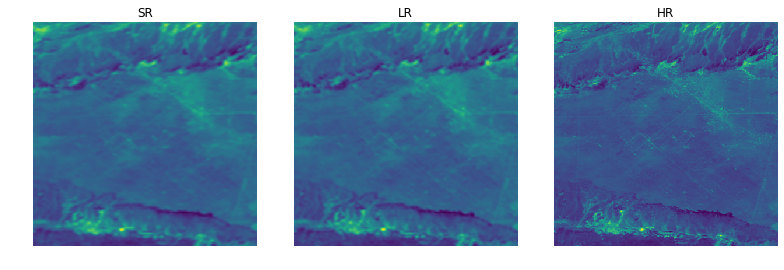

In [42]:
plot_num = 19
sr = output[0][0].numpy()

hr = hr

fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(131); ax1.imshow(sr); ax1.axis('off'); ax1.set_title('SR')
ax2 = fig.add_subplot(132); ax2.imshow(lr[0][0]); ax2.axis('off'); ax2.set_title('LR')
ax3 = fig.add_subplot(133); ax3.imshow(hr); ax3.axis('off'); ax3.set_title('HR')
plt.tight_layout()